In [82]:
import pandas as pd

In [83]:
url = 'pilrek-anon.csv'
df  = pd.read_csv(url)

In [84]:
df.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
2024,9/25/2019 8:54:33,Umum,25 - 40 th,Dicky Rezady Munaf (FSRD),Keberhasilan dan prestasi,Yang bersangkutan telah berhasil dalam mengemb...
2025,9/26/2019 13:30:25,Pegawai / Tendik,25 - 40 th,Kadarsah Suryadi (FTI-TI),Kecerdasan dan keberanian utk kemajuan ITB,NaN
2026,10/8/2019 14:28:00,Alumni,25 - 40 th,Dewi Larasati (SAPPK),"Emansipasi, kesetaraan dan kebhinekaan",NaN
2027,10/8/2019 14:59:53,Alumni,> 40 th,Dewi Larasati (SAPPK),Akhlak dan budi pekerti,ITB jadi universitas yang melahirkan tokoh2 du...
2028,10/8/2019 15:10:17,Alumni,> 40 th,Dewi Larasati (SAPPK),Sesuai dengan kriteria kekinian (Rektor 4.0),Semoga terpilih dan sukses


In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df.shape
df.dtypes

Timestamp               object
Kategori Anda           object
Kategori Umur Anda      object
CaRek Pilihan           object
Alasan Memilih CaRek    object
Harapan Anda            object
dtype: object

In [87]:
df.isna().sum()

Timestamp                  0
Kategori Anda              0
Kategori Umur Anda         0
CaRek Pilihan              0
Alasan Memilih CaRek       0
Harapan Anda            1123
dtype: int64

In [88]:
#Menghitung nilai modus dari nama calon rektor
CaRekPilihan_mode = df['CaRek Pilihan'].mode()
print(CaRekPilihan_mode)

0    Kadarsah Suryadi (FTI-TI)
dtype: object


In [89]:
#Membuat dataframe baru yang berisi khusus ca-rektor favorite tersebut
temp = df.groupby('CaRek Pilihan')
fav = temp.get_group('Kadarsah Suryadi (FTI-TI)') #Parameter nama CaRek harus diganti apabila modus berubah
fav.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
1760,9/6/2019 9:23:04,Pegawai / Tendik,25 - 40 th,Kadarsah Suryadi (FTI-TI),Program ybs utk peningkatan income dan kesejah...,peningkatan income dan kesejahteraan dosen / p...
1822,9/8/2019 17:25:50,Umum,> 40 th,Kadarsah Suryadi (FTI-TI),Keberhasilan dan prestasi,NaN
1852,9/11/2019 8:51:05,Dosen,> 40 th,Kadarsah Suryadi (FTI-TI),Program ybs utk peningkatan income dan kesejah...,Rektor ITB ke depan fapat menjadi good father ...
2015,9/17/2019 22:27:18,Mahasiswa,< 25 th,Kadarsah Suryadi (FTI-TI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN
2025,9/26/2019 13:30:25,Pegawai / Tendik,25 - 40 th,Kadarsah Suryadi (FTI-TI),Kecerdasan dan keberanian utk kemajuan ITB,NaN


In [90]:
#Membuat nilai per kategori untuk 
fav['Kategori Anda'].value_counts()

Alumni              83
Pegawai / Tendik    82
Umum                67
Mahasiswa           57
Dosen               35
Name: Kategori Anda, dtype: int64

In [91]:
#PLOT RADAR CHART untuk power seorang CaRek
#Terinspirasi dari Winning Eleven
import matplotlib.pyplot as plt

CaRek_voters = fav['Kategori Anda'].value_counts()


In [92]:
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

#Create a data frame from "fav"
CaRekFav = fav['Kategori Anda'].value_counts()

data = pd.DataFrame([CaRekFav], index = [CaRekPilihan_mode])
data


,Alumni,Pegawai / Tendik,Umum,Mahasiswa,Dosen
Kadarsah Suryadi (FTI-TI),83,82,67,57,35


In [93]:
Attributes =list(data)
AttNo = len(Attributes)

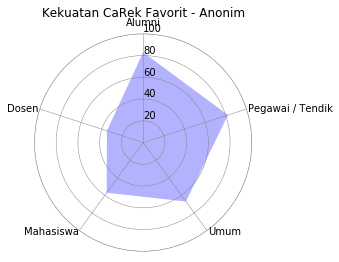

In [113]:
# Plots a radar chart.
 
# Set data
cat = Attributes
values = [83, 82, 67, 57, 35] #nilai harus diganti apabila nilai berganti
 
N = len(cat)
 
x_as = [n / float(N) * 2 * pi for n in range(N)]
 
# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values += values[:1]
x_as += x_as[:1]
 
 
# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")
 
 
# Create polar plot
ax = plt.subplot(111, polar=True)
 
 
# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
 
# Set position of y-labels
ax.set_rlabel_position(0)
 
 
# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
 
 
# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])
 
# Set yticks
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])
 
 
# Plot data
ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)
 
# Fill area
ax.fill(x_as, values, 'b', alpha=0.3)
 
 
# Set axes limits
plt.ylim(0, 100)
 
 
# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi
 
    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1
 
    ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")
 
# Show polar plot
plt.title("Kekuatan CaRek Favorit - Anonim")
plt.show()

In [95]:
#PLOT TIMESTAMP
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [96]:
df['TimestampH']=df.Timestamp.dt.hour
df['TimestampH'].tail()

2024     8
2025    13
2026    14
2027    14
2028    15
Name: TimestampH, dtype: int64

In [97]:
hour=df.loc[df.Timestamp.dt.hour==9].sort_values('TimestampH').tail()

In [101]:
type(df['TimestampH'])

pandas.core.series.Series

Text(0.5, 1.0, 'Timestamp Jam Pengisian Survey - Anonim')

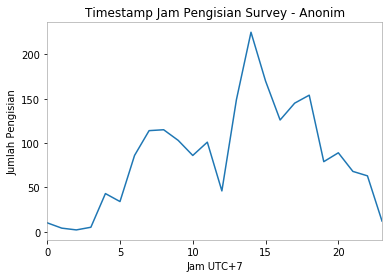

In [108]:
df['TimestampH'].value_counts(sort=False).plot()
plt.xlabel("Jam UTC+7")
plt.ylabel("Jumlah Pengisian")
plt.title("Timestamp Jam Pengisian Survey - Anonim")